<a href="https://colab.research.google.com/github/FabioVCoelho/Univali/blob/master/ProcessamentoDeImagem/Pre_processing_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

def print_img(img):
  #Display the image
  cv2_imshow(img)
  #key binding function
  cv2.waitKey(0)
  #Destroyed all window we created earlier.
  cv2.destroyAllWindows()

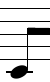

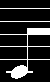

In [ ]:
image = cv2.imread("/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/Dó/15.png")
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
# Remove vertical
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,30))
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(image, [c], -1, (255,255,255), 2)

print_img(image)
print_img(thresh)

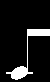

In [ ]:
vertical = np.copy(thresh)
# Specify size on vertical axis
rows = vertical.shape[0]
verticalsize = rows // 30
# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
# Apply morphology operations
vertical = cv2.erode(vertical, verticalStructure)
vertical = cv2.dilate(vertical, verticalStructure)
# Show extracted vertical lines
print_img(vertical)

In [ ]:
# image = cv2.imread("/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/Dó/13.png")
path = "/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/NotesToModel/Fa/"
for image in os.listdir(path):
  gray = cv2.cvtColor(cv2.imread(path + image),cv2.COLOR_RGB2GRAY)
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  horizontal = np.copy(thresh)
  # Specify size on horizontal axis
  cols = horizontal.shape[1]
  horizontal_size = cols // 9
  # Create structure element for extracting horizontal lines through morphology operations
  horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
  # Apply morphology operations
  horizontal = cv2.erode(horizontal, horizontalStructure)
  horizontal = cv2.dilate(horizontal, horizontalStructure)
  # Show extracted horizontal lines
  print_img(cv2.bitwise_not(horizontal))
  cv2.imwrite("/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/NotasSóComBolinhas/Fa/" + image,cv2.bitwise_not(horizontal))

In [ ]:
for image in os.listdir("/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/NotesToModel/Fa"):
  print(image)

In [ ]:
# image = cv2.imread("/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/Dó/13.png")
path = "/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/NotesToModel/Mi/"
for image in os.listdir(path):
  gray = cv2.cvtColor(cv2.imread(path + image),cv2.COLOR_RGB2GRAY)
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  horizontal = np.copy(thresh)
  # Specify size on horizontal axis
  cols = horizontal.shape[1]
  horizontal_size = cols // 9
  # Create structure element for extracting horizontal lines through morphology operations
  horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
  # Apply morphology operations
  horizontal = cv2.erode(horizontal, horizontalStructure)
  horizontal = cv2.dilate(horizontal, horizontalStructure)
  # Show extracted horizontal lines
  print_img(cv2.bitwise_not(horizontal))
  cv2.imwrite("/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/NotasSóComBolinhas/Mi/" + image,cv2.bitwise_not(horizontal))

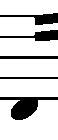

KeyboardInterrupt: ignored

In [ ]:
# image = cv2.imread("/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/Dó/13.png")
path = "/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/Ré/"
for image in os.listdir(path):
  gray = cv2.cvtColor(cv2.imread(path + image),cv2.COLOR_RGB2GRAY)
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  horizontal = np.copy(thresh)
  # Specify size on horizontal axis
  cols = horizontal.shape[1]
  horizontal_size = cols // 9
  # Create structure element for extracting horizontal lines through morphology operations
  horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
  # Apply morphology operations
  horizontal = cv2.erode(horizontal, horizontalStructure)
  horizontal = cv2.dilate(horizontal, horizontalStructure)
  # Show extracted horizontal lines
  print_img(cv2.bitwise_not(horizontal))
  cv2.imwrite("/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/NotasSóComBolinhas/Re/" + image,cv2.bitwise_not(horizontal))

In [2]:
def note_and_bars(image):
  gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  horizontal = np.copy(thresh)
  # Specify size on horizontal axis
  cols = horizontal.shape[1]
  horizontal_size = cols // 10
  # Create structure element for extracting horizontal lines through morphology operations
  horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
  # Apply morphology operations
  horizontal = cv2.erode(horizontal, horizontalStructure)
  horizontal = cv2.dilate(horizontal, horizontalStructure)
  return horizontal

In [3]:
def thick_rectangle(image):
  gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  horizontal_thick_bar = np.copy(thresh)
  # Specify size on horizontal axis
  cols = horizontal_thick_bar.shape[1]
  horizontal_size = cols // 2
  # Create structure element for extracting horizontal lines through morphology operations
  horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 7))
  # Apply morphology operations
  horizontal_thick_bar = cv2.erode(horizontal_thick_bar, horizontalStructure)
  horizontal_thick_bar = cv2.dilate(horizontal_thick_bar, horizontalStructure)
  return horizontal_thick_bar

In [ ]:
img_without_thick_bar = cv2.subtract(horizontal,horizontal_thick_bar)

In [4]:
def get_horizontal_line(image):
  gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  horizontal_lines = np.copy(thresh)
  # Specify size on horizontal axis
  cols = horizontal_lines.shape[1]
  horizontal_size = cols + 200
  # Create structure element for extracting horizontal lines through morphology operations
  horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
  # Apply morphology operations
  horizontal_lines = cv2.erode(horizontal_lines, horizontalStructure)
  horizontal_lines = cv2.dilate(horizontal_lines, horizontalStructure)
  return horizontal_lines


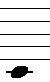

In [ ]:
print_img(cv2.bitwise_not(cv2.add(img_without_thick_bar, horizontal_lines)))

-------------Lines-----------------


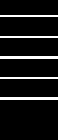

-------------Thick lines-----------------


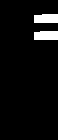

------------Note and lines------------------


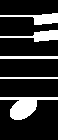

------------Remove thick lines------------------


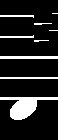

-------------Only note and lines-----------------


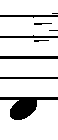

In [23]:
imagem_path = "/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/Ré/Screenshot from 2020-10-21 20-25-47.png"
note_and_bars_img = note_and_bars(cv2.imread(imagem_path))
thick_bar = thick_rectangle(cv2.imread(imagem_path))
lines = get_horizontal_line(cv2.imread(imagem_path))
img_without_thick_bar = cv2.subtract(cv2.bitwise_not(thick_bar),cv2.bitwise_not(note_and_bars_img))
only_note_img = cv2.add(lines, img_without_thick_bar)

print("-------------Lines-----------------")
print_img(lines)
print("-------------Thick lines-----------------")
print_img(thick_bar)
print("------------Note and lines------------------")
print_img(note_and_bars_img)
print("------------Remove thick lines------------------")
print_img(img_without_thick_bar)
print("-------------Only note and lines-----------------")
print_img(cv2.bitwise_not(only_note_img))

In [8]:
# image = cv2.imread("/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/Dó/13.png")
path = "/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/Nossa base/out/re/"
for image in os.listdir(path):
  note_and_bars_img = note_and_bars(cv2.imread(path + image))
  thick_bar = thick_rectangle(cv2.imread(path + image))
  lines = get_horizontal_line(cv2.imread(path + image))
  img_without_thick_bar = cv2.subtract(cv2.bitwise_not(thick_bar),cv2.bitwise_not(note_and_bars_img))
  only_note_img = cv2.bitwise_not(cv2.add(lines, img_without_thick_bar))
  #print_img(only_note_img)
  cv2.imwrite("/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/NotasSóComBolinhas/Re/" + image,only_note_img)

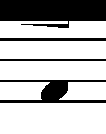

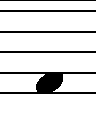

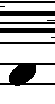

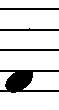

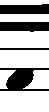

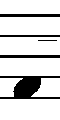

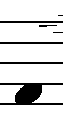

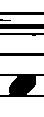

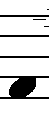

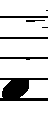

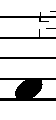

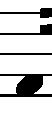

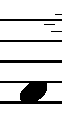

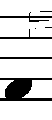

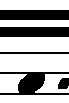

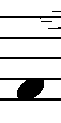

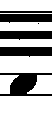

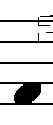

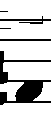

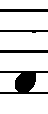

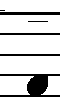

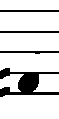

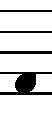

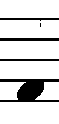

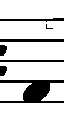

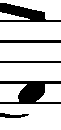

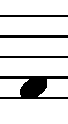

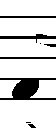

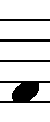

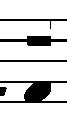

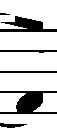

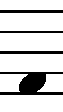

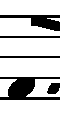

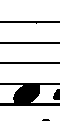

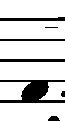

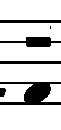

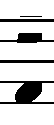

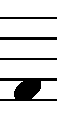

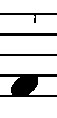

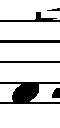

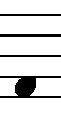

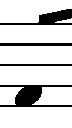

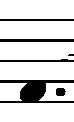

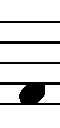

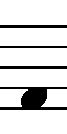

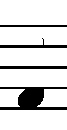

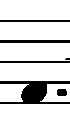

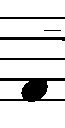

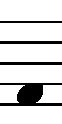

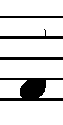

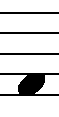

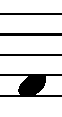

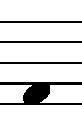

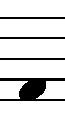

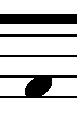

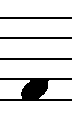

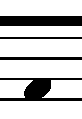

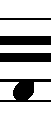

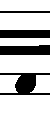

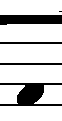

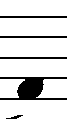

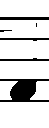

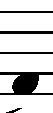

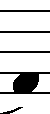

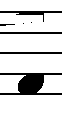

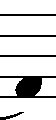

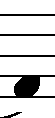

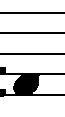

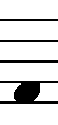

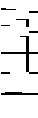

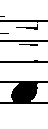

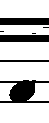

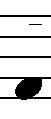

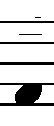

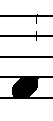

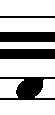

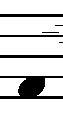

In [ ]:
# image = cv2.imread("/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/Dó/13.png")
path = "/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/NotesToModel/Fa/"
for image in os.listdir(path):
  note_and_bars_img = note_and_bars(cv2.imread(path + image))
  thick_bar = thick_rectangle(cv2.imread(path + image))
  lines = get_horizontal_line(cv2.imread(path + image))
  img_without_thick_bar = cv2.subtract(cv2.bitwise_not(thick_bar),cv2.bitwise_not(note_and_bars_img))
  only_note_img = cv2.bitwise_not(cv2.add(lines, img_without_thick_bar))
  print_img(only_note_img)
  cv2.imwrite("/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/NotasSóComBolinhas/Fa/" + image,only_note_img)

In [ ]:
def get_circles_from_image(image):
  # Read image. 
  img = cv2.imread(image, cv2.IMREAD_COLOR) 

  # Convert to grayscale. 
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 

  # Blur using 3 * 3 kernel. 
  gray_blurred = cv2.blur(gray, (3, 3)) 

  # Apply Hough transform on the blurred image. 
  detected_circles = cv2.HoughCircles(gray_blurred,  
            cv2.HOUGH_GRADIENT, 1, 20, param1 = 40, 
        param2 = 10, minRadius = 10, maxRadius = 30) 

  # Draw circles that are detected. 
  if detected_circles is not None: 

    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles))

    for pt in detected_circles[0, :]:
      print(pt)
      a, b, r = pt[0], pt[1], pt[2] 

      # Draw the circumference of the circle. 
      # cv2.circle(img, (a, b), r, (0, 255, 0), 2)

      print(len(img[:]))

      if (a+r > len(img)):
        param1 = len(img)
      else:
        param1 = a + r

      if (a-r > len(img)):
        param2 = 0
      else:
       param2 = a - r

      if (b+r > len(img)):
        param3 = len(img)
      else:
        param3 = b + r

      if (b-r > len(img)):
        param4 = 0
      else:
        param4 = b - r
      return img[param4:param3]

In [ ]:
import numpy as np
import cv2

img = cv2.imread('/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/Dó/15.png',cv2.IMREAD_COLOR)
a1=14
b1=62
r=14
cv2.circle(img,(a1,b1), r, (0,0,0),2)
result = img[a1-r:a1+r,b1-r:b1+r]
print_img(result)
# cv2.imshow('image',img)
# cv2.imshow('result',result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()